In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
import math
from sklearn import metrics

Ładowanie i zapoznawanie się z danymi

In [51]:
data = pd.read_csv("train.csv", low_memory=False)
y = pd.Series(data['Credit_Score'])
X = data.drop(['Credit_Score'],axis=1)
# Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123
)
X_train, X_test, y_train, y_test = train_test_split(
     X_train, y_train, test_size=0.2, random_state=123
)

In [52]:
data.Credit_Score.unique() 

array(['Good', 'Standard', 'Poor'], dtype=object)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [54]:
data.shape

(100000, 28)

Podział zbioru

In [ ]:
# y = pd.Series(data['Credit_Score'])
# X = data.drop(['Credit_Score'],axis=1)
# # Train - budowa, test - zbior testowy dla budowy, val - zbiór dla validacji
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.2, random_state=123
# )
# X_train, X_test, y_train, y_test = train_test_split(
#      X_train, y_train, test_size=0.2, random_state=123
# )

Usuwanie kolumn i czyszczenie zbioru

In [55]:
def create_df(X,y):
  return X.join(y)

def drop_columns(df):
  drop_cols = ['ID','Name','SSN']
  df_dropped = df.drop(drop_cols , axis=1)
  return df_dropped

<span style="color: red"> Usuwanie zbyt dużej ilości kolumn zostało poprawione</span> 

In [56]:
Train = create_df(X_train,y)
Train_dropped = drop_columns(Train)

In [57]:
for i in Train_dropped:
  print('\n',i,Train_dropped[i].unique())


 Customer_ID ['CUS_0x48ca' 'CUS_0xab2b' 'CUS_0xc5f8' ... 'CUS_0xc730' 'CUS_0x67cb'
 'CUS_0x59b5']

 Month ['February' 'June' 'April' 'May' 'August' 'March' 'July' 'January']

 Age ['40' '35' '21' ... '5195' '2181' '1512']

 Occupation ['_______' 'Entrepreneur' 'Musician' 'Manager' 'Mechanic' 'Journalist'
 'Architect' 'Engineer' 'Writer' 'Accountant' 'Doctor' 'Teacher'
 'Developer' 'Media_Manager' 'Scientist' 'Lawyer']

 Annual_Income ['40878.85' '31985.64_' '19998.33' ... '38750.41_' '68489.16_'
 '10796916.0']

 Monthly_Inhand_Salary [3440.57083333 2537.47       1810.5275     ... 1389.81041667 1209.70458333
 1086.48605979]

 Num_Bank_Accounts [   0    5    8    3    4    7    9    6   10    2    1   -1  803  448
 1075   11 1611  351  239  697  868  738 1481 1257 1763 1647  135  549
 1724  885  912  385 1624 1235 1137  761  695   83  802  886 1539  443
  809 1096  854 1632 1748  511  540 1447 1766 1195   34 1727 1041   35
  690 1784  572  481  991 1551   41  561  368 1534  624  232 157


 Payment_of_Min_Amount ['No' 'Yes' 'NM']

 Total_EMI_per_month [1.05017091e+02 6.58346669e+01 4.29465250e+01 ... 9.87221197e+01
 3.86400000e+03 5.21780000e+04]

 Amount_invested_monthly ['381.3557333047378' '41.359838924330774' '179.15786414156628' ...
 '567.9397511458711' '95.09151019491188' '290.519469687981']

 Payment_Behaviour ['Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'Low_spent_Large_value_payments' 'High_spent_Large_value_payments'
 '!@9#%8' 'High_spent_Small_value_payments'
 'Low_spent_Medium_value_payments']

 Monthly_Balance ['147.68425871367467' '396.5524941408458' '248.94836083998496' ...
 '210.1571925156653' '653.8015088844927' '775.1096559103393']

 Credit_Score ['Good' 'Poor' 'Standard']


In [58]:
def clean_records(df):
  clean = df.copy()
  pattern = "\\`*_{}[]()>#@+!$:;%"
  num_columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
           'Interest_Rate', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Num_Credit_Inquiries']
  str_columns = ['Month','Occupation','Credit_History_Age','Payment_of_Min_Amount', 'Type_of_Loan', 'Credit_Mix', 'Payment_Behaviour']
  for i in num_columns:
    for c in pattern:
      clean[i] = clean[i].astype(str).str.replace(c,'')

  for i in str_columns:
    for c in pattern:
      clean[i] = clean[i].replace(c,'')
  return clean


In [59]:
Train_clean_records = clean_records(Train_dropped)
Train_clean_records.head()

C:\Users\karim\AppData\Local\Temp/ipykernel_17804/1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
98425,CUS_0x48ca,February,40,_______,40878.85,3440.570833333333,0,5,11,4,...,Good,1360.31,26.81701555338201,24 Years and 0 Months,No,105.01709131492088,381.3557333047378,Low_spent_Small_value_payments,147.68425871367467,Good
20877,CUS_0xab2b,June,35,Entrepreneur,31985.64,2537.47,5,6,11,4,...,Standard,2615.0,28.991281345294343,5 Years and 8 Months,Yes,65.83466693482337,41.359838924330774,High_spent_Medium_value_payments,396.5524941408458,Poor
74091,CUS_0xc5f8,April,21,Musician,19998.33,1810.5275,8,6,12,3,...,Standard,1035.7,38.51756452024465,15 Years and 8 Months,Yes,42.94652501844877,179.15786414156628,Low_spent_Small_value_payments,248.94836083998496,Standard
9412,CUS_0x333c,May,20,Manager,46640.82,3824.735,3,4,13,3,...,,816.11,35.10770374043042,29 Years and 9 Months,No,75.53576696978119,92.49321517147406,High_spent_Medium_value_payments,464.4445178587448,Good
10687,CUS_0xabc6,August,26,Mechanic,20380.51,1854.375833333333,8,3,20,5,...,Standard,153.7,34.59073976080707,13 Years and 8 Months,Yes,57.299498128700144,170.10406404178968,Low_spent_Large_value_payments,228.03402116284352,Standard


In [60]:
def Credit_History_Age_trasform(df):
  CHA_transform = df.copy()
  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(str).str.replace('Months','')

  for i in CHA_transform.Credit_History_Age.index:
    if CHA_transform.Credit_History_Age[i][-3] == ".":
       CHA_transform.Credit_History_Age[i] = str(CHA_transform.Credit_History_Age[i]).replace(".", ".0")

  CHA_transform['Credit_History_Age'] = CHA_transform['Credit_History_Age'].astype(float)
  CHA_transform['Credit_History_Age'] = (CHA_transform['Credit_History_Age'] % 1 * 100 + CHA_transform['Credit_History_Age'] // 1) * 12
  return CHA_transform

In [61]:
Train_CHA_transformed = Credit_History_Age_trasform(Train_clean_records)
Train_CHA_transformed.Credit_History_Age

98425    288.0
20877    156.0
74091    276.0
9412     456.0
10687    252.0
         ...  
31550    396.0
95515    276.0
30594    288.0
66172    276.0
49371    336.0
Name: Credit_History_Age, Length: 64000, dtype: float64

<AxesSubplot:>

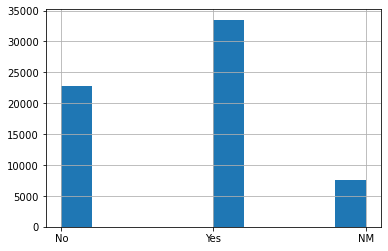

In [62]:
Train_CHA_transformed.Payment_of_Min_Amount.hist()

Kodowanie kolumn

In [63]:
def colums_encoding(df):

    df["Payment_Behaviour"] = df["Payment_Behaviour"].replace('!@9#%8', 'Unknown_spent_Unknown_value_payments')
    split_payment = lambda x:  ([x.split("_")[0], x.split("_")[2]] if (x is not None) else ["Unknown", "Unknown"])
    df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(split_payment)
    df[["Spending_Behaviour", "Value_Payments"]] = pd.DataFrame(df["Payment_Behaviour"].tolist(), index=df.index)
    spending_dict = {'Low':0, 'High':1, 'Unknown':float('nan')}
    value_dict = {'Small':0, 'Medium':1, 'Large':2,  'Unknown':float('nan')}
    df['Spending_Behaviour'] = df['Spending_Behaviour'].map(spending_dict)
    df['Value_Payments'] = df['Value_Payments'].map(value_dict)
    del df["Payment_Behaviour"]

    dict_target={'Poor': "0", 
          "Standard":"1", 
          "Good":"2"}
    df.Credit_Score = df.Credit_Score.map(dict_target).astype(float)

    df = pd.get_dummies(df, prefix='Minimal', columns=['Payment_of_Min_Amount'], drop_first=False)
    return df

<span style='color: red'> Uwagi zespołu walidacyjnego dotyczące funkcji columns_encoding zostały wysłuchane</span>

In [64]:
Train_encoded = colums_encoding(Train_CHA_transformed)
Train_encoded.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Behaviour,Value_Payments,Minimal_NM,Minimal_No,Minimal_Yes
98425,CUS_0x48ca,February,40,_______,40878.85,3440.570833333333,0,5,11,4,...,288.0,105.01709131492088,381.3557333047378,147.68425871367467,2.0,0.0,0.0,0,1,0
20877,CUS_0xab2b,June,35,Entrepreneur,31985.64,2537.47,5,6,11,4,...,156.0,65.83466693482337,41.359838924330774,396.5524941408458,0.0,1.0,1.0,0,0,1
74091,CUS_0xc5f8,April,21,Musician,19998.33,1810.5275,8,6,12,3,...,276.0,42.94652501844877,179.15786414156628,248.94836083998496,1.0,0.0,0.0,0,0,1
9412,CUS_0x333c,May,20,Manager,46640.82,3824.735,3,4,13,3,...,456.0,75.53576696978119,92.49321517147406,464.4445178587448,2.0,1.0,1.0,0,1,0
10687,CUS_0xabc6,August,26,Mechanic,20380.51,1854.375833333333,8,3,20,5,...,252.0,57.299498128700144,170.10406404178968,228.03402116284352,1.0,0.0,2.0,0,0,1


In [65]:
Train_encoded.dtypes

Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary        object
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                object
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date          object
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries         object
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio     object
Credit_History_Age          float64
Total_EMI_per_month          object
Amount_invested_monthly      object
Monthly_Balance              object
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                 

In [66]:
def encoding_to_num(df):
  df_encoding_int = df.copy()
  columns = ['Age', 'Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
             'Total_EMI_per_month','Monthly_Balance','Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
             'Interest_Rate', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', "Changed_Credit_Limit", "Num_Credit_Inquiries"]
  df_encoding_int.Changed_Credit_Limit = [str(i or np.NaN) for i in df_encoding_int.Changed_Credit_Limit]
  for i in columns:
    df_encoding_int[i] = df_encoding_int[i].astype(float)

  
  return df_encoding_int

In [67]:
Train_encoded_int = encoding_to_num(Train_encoded)
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace('and ','')
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace(' Loan','')
Train_encoded_int['Type_of_Loan'] = Train_encoded_int['Type_of_Loan'].astype(str).str.replace('nan','nany')
Train_encoded_int.dtypes

Customer_ID                  object
Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                 

In [68]:
def encoding_columns_2(df):
  df_drop = df.copy()
  dict_target={'Bad': 0, 
          "Standard":1, 
          "Good":2,
          "":float('nan')}
  df_drop.Credit_Mix = df_drop.Credit_Mix.map(dict_target).astype(float)


  dict_target={'January': 1, 
          "February":2, 
          "March":3,
          "April":4,
          "May":5,
          "June":6,
          "July":7,
          "August":8,
          "September":9,
          "October":10,
          "November":11,
          "December":12}


  df_drop.Month = df_drop.Month.map(dict_target).astype(float)
  sin_values = [math.sin((2*math.pi*x)/12) for x in list(df_drop.Month)]
  cos_values = [math.cos((2*math.pi*x)/12) for x in list(df_drop.Month)]
  df_drop = df_drop.assign(Month_sin = sin_values, Month_cos = cos_values)
  df_drop = df_drop.drop("Month", axis = 1)


  
  text = ""
  for i in Train_encoded_int.Type_of_Loan:
    text = text + i + ","
  
  texting = list(text.split(","))
  for i in range(len(texting)):
    texting[i] = texting[i].strip()
  texting = list(set(texting))
  try:
    texting.remove('')
  except ValueError:
    pass
  
  try:
    texting.remove('nany')
  except ValueError:
    pass
  
  for i in texting:
    x = []
    for j in df_drop.Type_of_Loan:
      x.append(str(j).count(i))
    df_drop[i] = x
  
  df_drop = df_drop.drop("Type_of_Loan", axis = 1)


  return df_drop

In [24]:
Train_dropped = dropping2(Train_encoded_int)

NameError: name 'dropping2' is not defined

<span style='color: red'>powinno być encoding_columns_2 a nie dropping 2</span>

In [69]:
Train_dropped = encoding_columns_2(Train_encoded_int)

In [70]:
Train_dropped.Occupation.value_counts()

_______          4567
Lawyer           4194
Scientist        4117
Developer        4101
Architect        4087
Engineer         4028
Media_Manager    4010
Accountant       4001
Mechanic         3964
Teacher          3926
Journalist       3896
Entrepreneur     3879
Doctor           3841
Writer           3817
Musician         3790
Manager          3782
Name: Occupation, dtype: int64

In [71]:
def occupation_agg(df):
  df_agg = df.copy()
  df_agg['Occupation'] = df_agg['Occupation'].astype(str).str.replace('_______','Other')
  df_agg = pd.get_dummies(df_agg, prefix='Occupation', columns=['Occupation'], drop_first=False)
  df_agg = df_agg.drop_duplicates()
  return df_agg

In [72]:
Train_occ_agg = occupation_agg(Train_dropped)
Train_occ_agg.dtypes

Customer_ID                  object
Age                         float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                float64
Spending_Behaviour          float64
Value_Payments              float64
Minimal_NM                    uint8
Minimal_No                    uint8
Minimal_Yes                   uint8
Month_sin                   float64
Month_cos                   float64
Not Specified               

In [73]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

Zamiana nulli

In [74]:
Train_swaped = swap_columns(Train_occ_agg, 'Credit_Score', 'Occupation_Writer')
Train_swaped.isnull().sum()

Customer_ID                     0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary        9515
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       4460
Changed_Credit_Limit         1356
Num_Credit_Inquiries         1271
Credit_Mix                  12976
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           5824
Total_EMI_per_month             0
Amount_invested_monthly      2885
Monthly_Balance               735
Occupation_Writer               0
Spending_Behaviour           4936
Value_Payments               4936
Minimal_NM                      0
Minimal_No                      0
Minimal_Yes                     0
Month_sin                       0
Month_cos                       0
Not Specified                   0
Auto                            0
Student       

<span style='color: red'>W jakim celu zamieniana jest kolumna credit_score i occupation_writer?</span>

In [75]:
def fill_missing_values(df):
  df_na = df.copy()

  
  cols = list(df_na.columns.values)
  cols.remove('Customer_ID')
  cols.remove('Credit_Score')
  for i in cols:
    df_na[i] = df_na[i].fillna(df_na.groupby('Customer_ID')[i].transform("median"))
    df_na[i].fillna(Train_swaped[i].median(), inplace = True)
  df_na = df_na.drop("Customer_ID", axis = 1)

  
  return df_na

Korelacje i outliery

<AxesSubplot:>

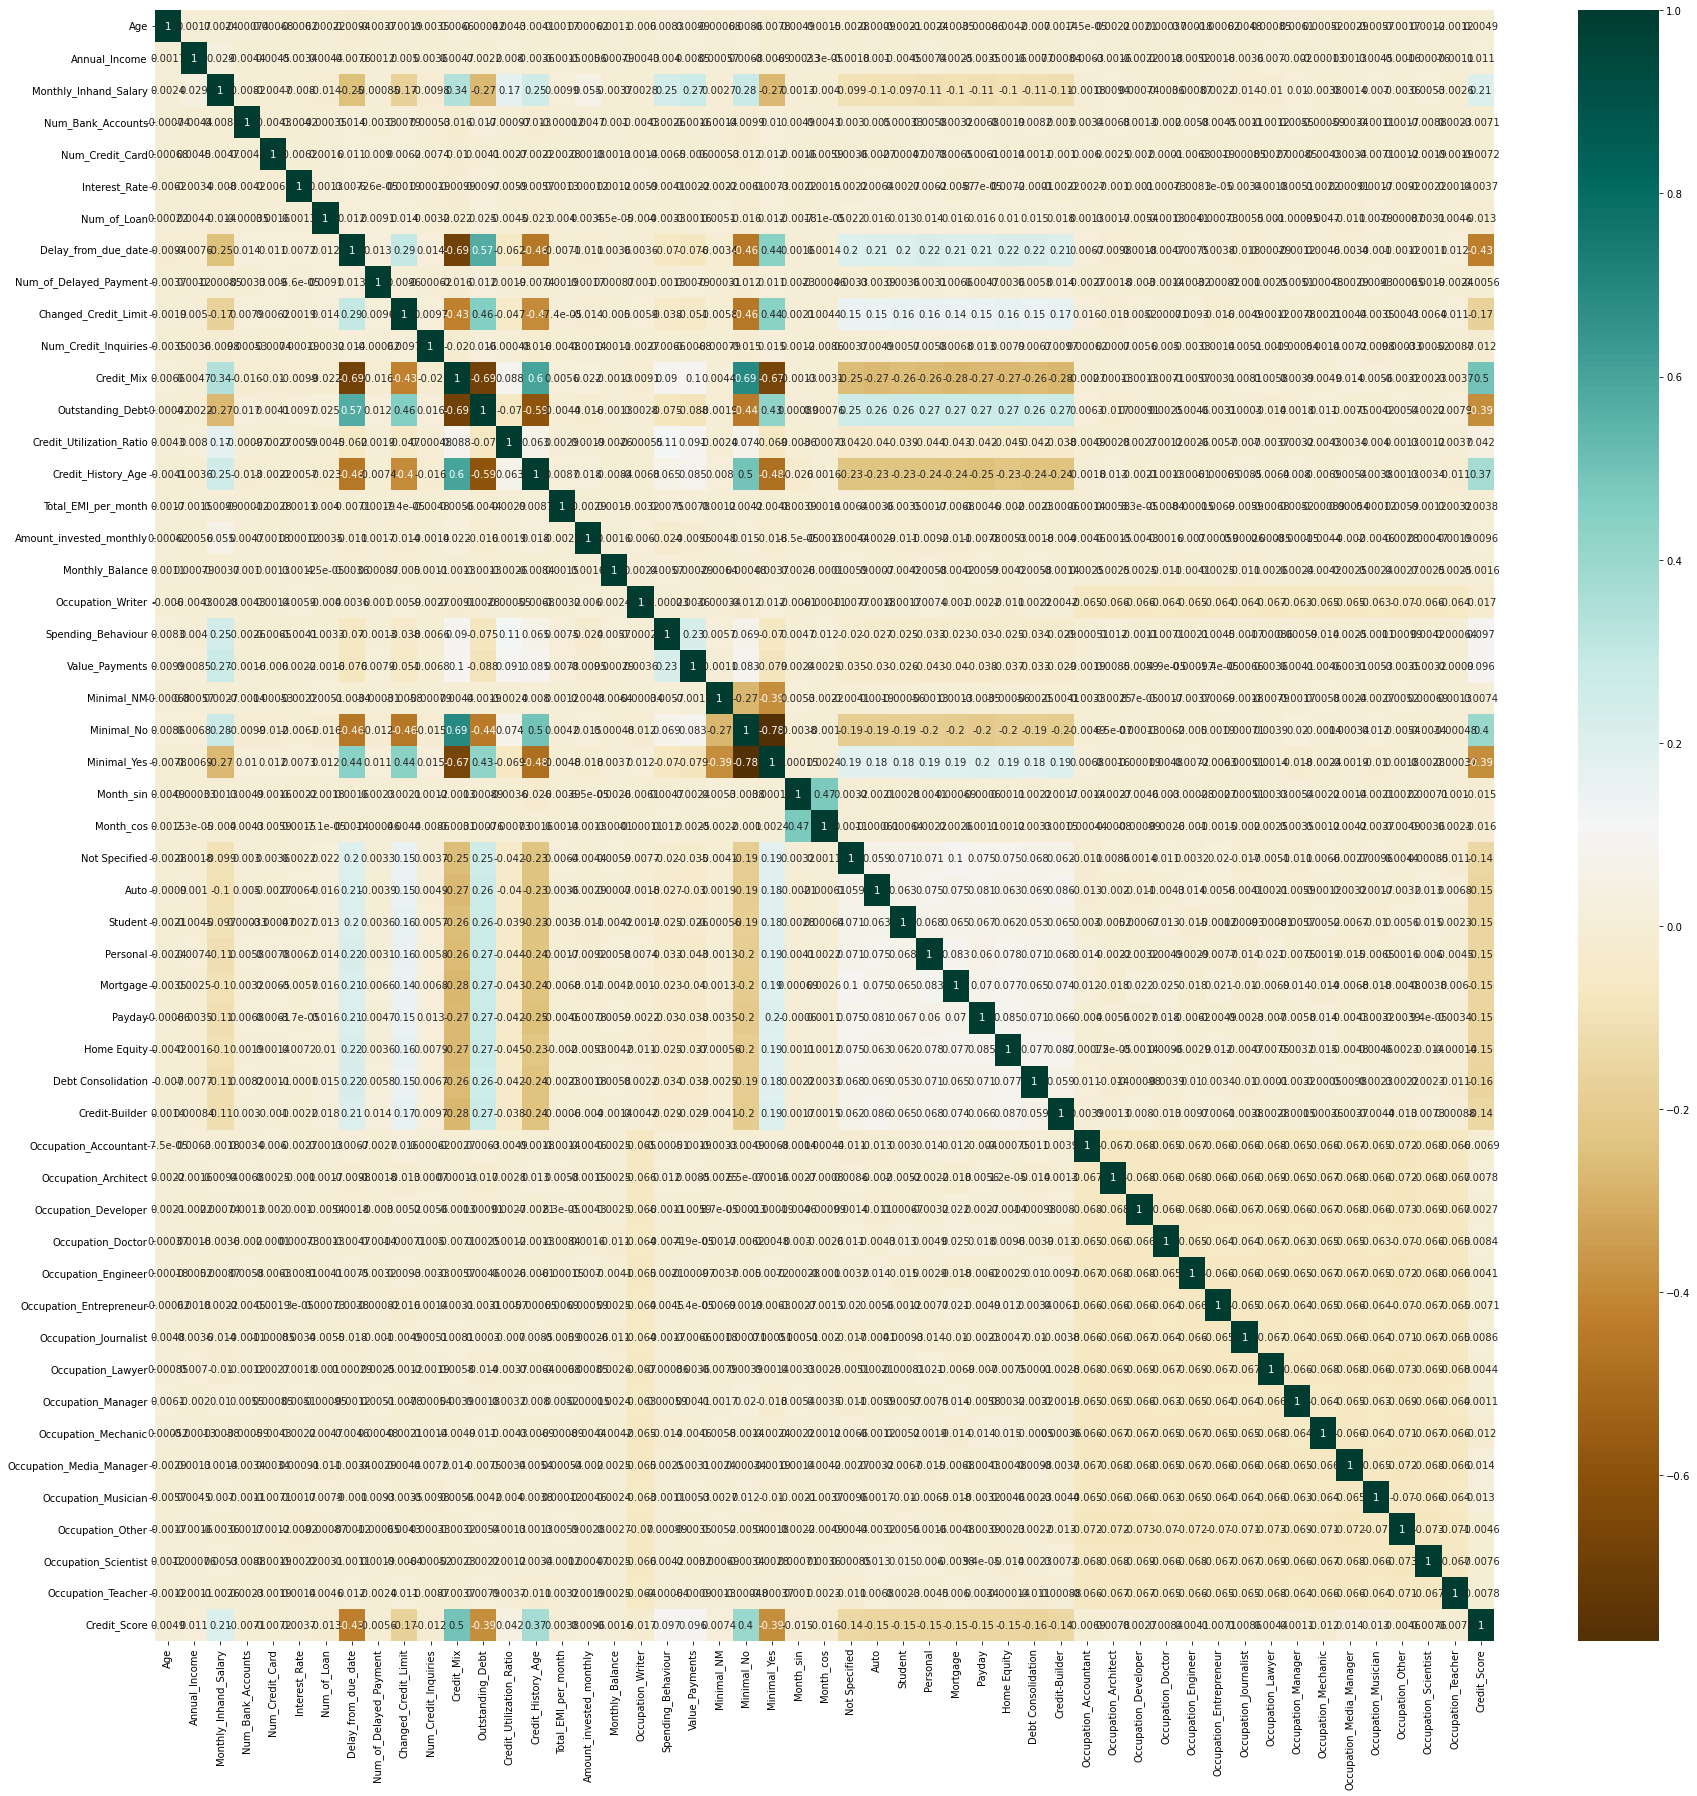

In [76]:
Train_na = fill_missing_values(Train_swaped)
corr_matrix = Train_na.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix,cmap="BrBG",annot=True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_in

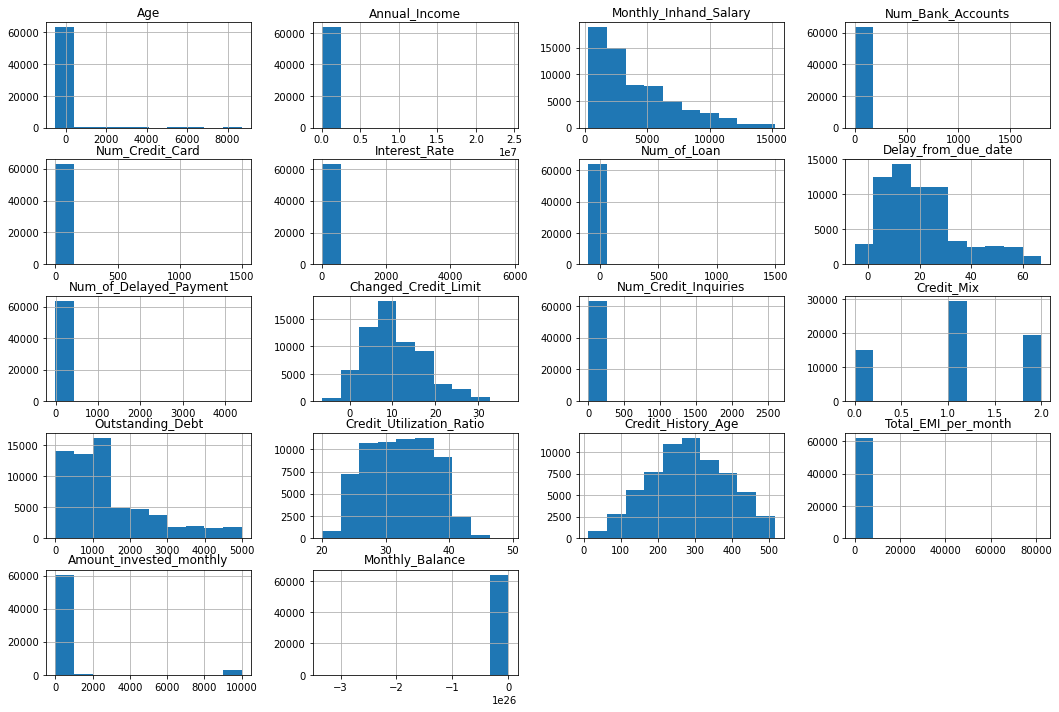

In [77]:
Train_na.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))


In [78]:
def outliers_agg(df):
  names = ["Age", "Annual_Income", "Num_Bank_Accounts", "Num_of_Delayed_Payment",
             "Monthly_Balance", "Num_Credit_Inquiries"]
  df_agg = df.copy()
  for i in names:
    upper_lim = Train_na[i].quantile(.98)
    lower_lim = Train_na[i].quantile(.02)
    df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                   np.where(df_agg[i]>upper_lim, upper_lim,
                    df_agg[i]))
    
  names = ['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Total_EMI_per_month']  
  for i in names:
    upper_lim = Train_na[i].quantile(.96)
    lower_lim = Train_na[i].quantile(.04)
    df_agg[i] = np.where(df_agg[i] < lower_lim, lower_lim,
                   np.where(df_agg[i]>upper_lim, upper_lim,
                    df_agg[i]))
    
  
  upper_lim = Train_na['Amount_invested_monthly'].quantile(.955)
  lower_lim = Train_na['Amount_invested_monthly'].quantile(.045)
  df_agg['Amount_invested_monthly'] = np.where(df_agg['Amount_invested_monthly'] < lower_lim, lower_lim,
                   np.where(df_agg['Amount_invested_monthly']>upper_lim, upper_lim,
                    df_agg['Amount_invested_monthly']))

  return df_agg

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Num_Bank_Accounts'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Num_of_Delayed_Payment'}>,
        <AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Credit_Mix'}>],
       [<AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Credit_History_Age'}>,
        <AxesSubplot:title={'center':'Total_EMI_per_month'}>],
       [<AxesSubplot:title={'center':'Amount_in

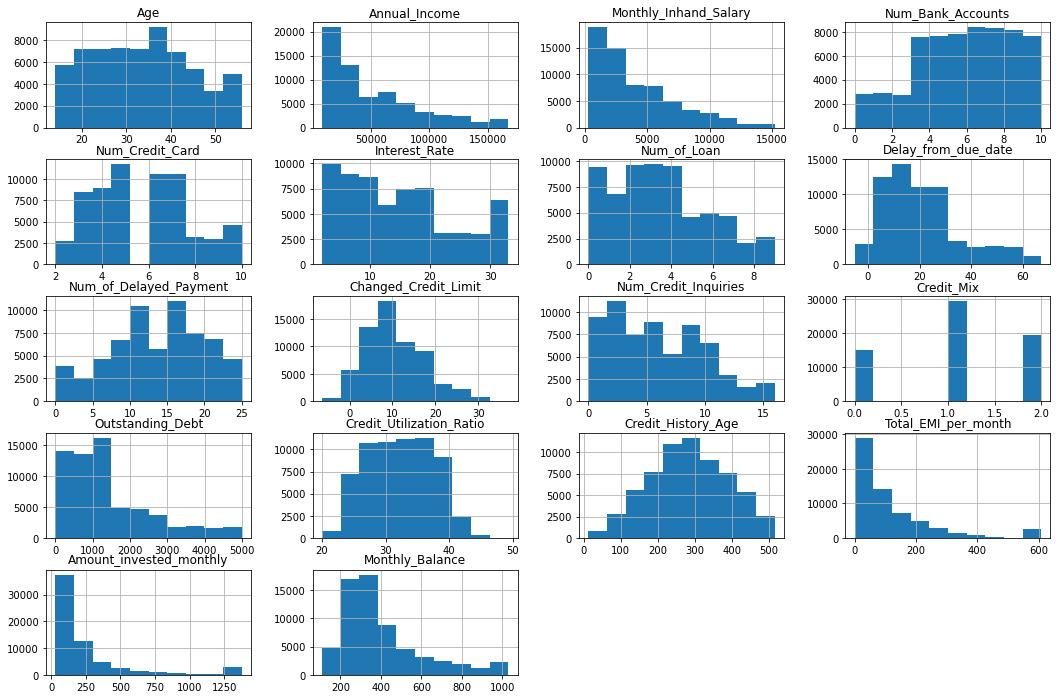

In [79]:
Train_outliers = outliers_agg(Train_na)
Train_outliers.loc[:,"Age":"Monthly_Balance"].hist(figsize = (18,12))

<AxesSubplot:>

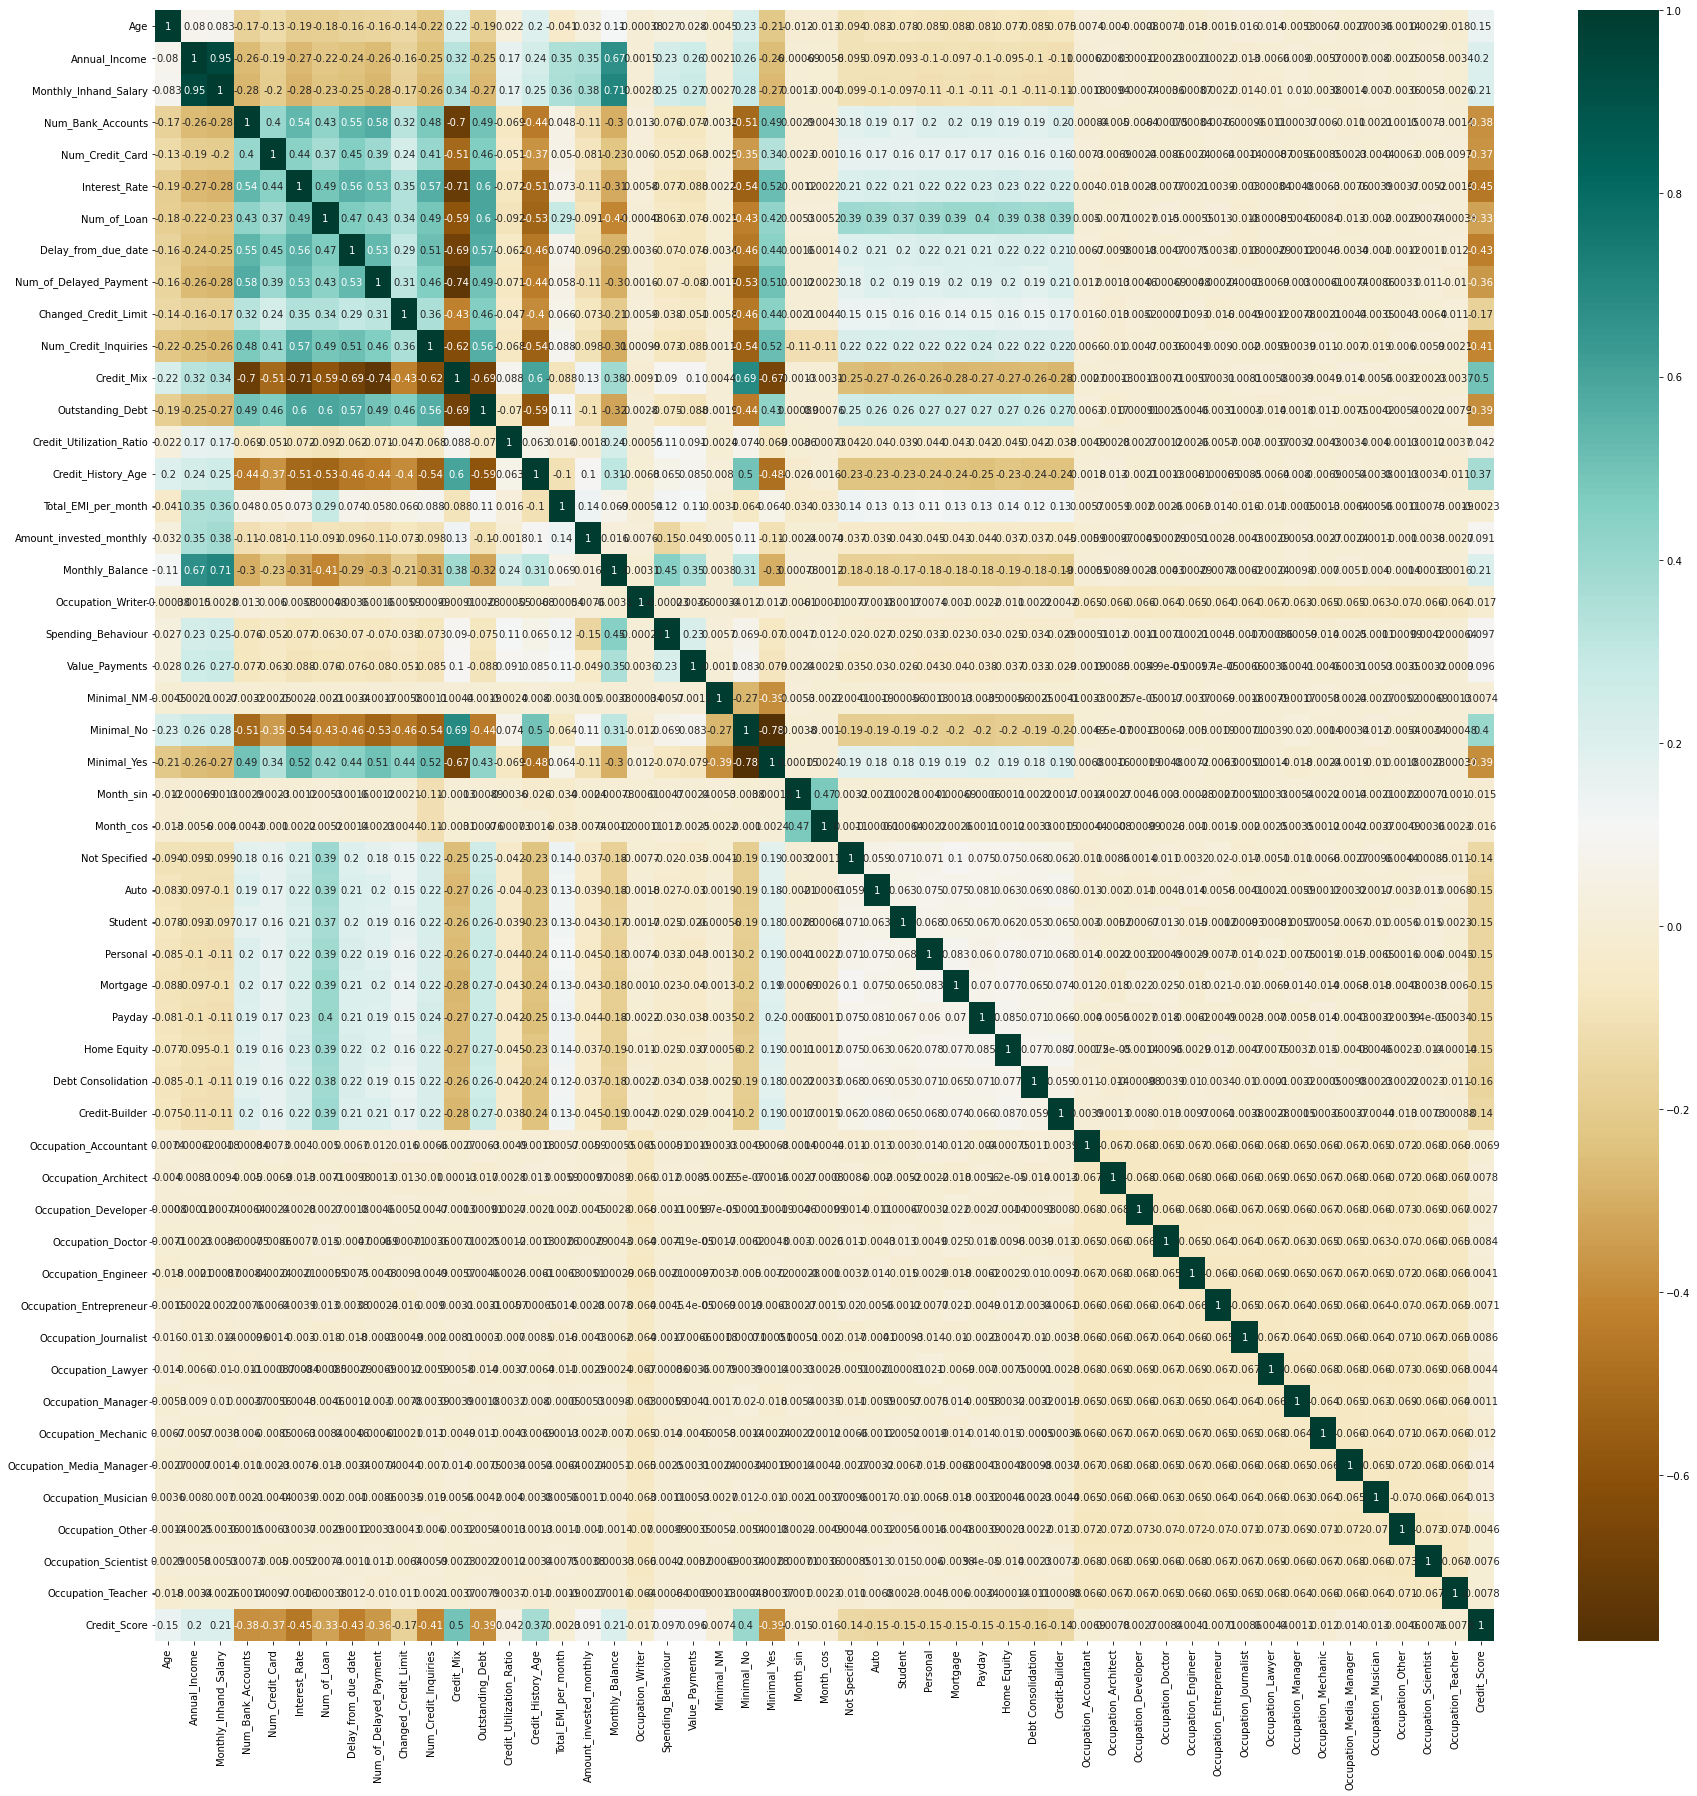

In [80]:
corr_matrix_p = Train_outliers.corr("pearson")
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix_p,cmap="BrBG",annot=True)


Normalizacja

In [81]:
def normal(df):
  df_norm = df.copy()
  norm_col = df_norm.columns.values[:-1]
  scaler_norm = MinMaxScaler()
  for i in df_norm[norm_col]:
    scaler_norm.fit(Train_outliers[[i]])
    df_norm[i] = scaler_norm.transform(df_norm[[i]])

  return df_norm

In [82]:
Train_norm = normal(Train_outliers)
Train_norm.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Other,Occupation_Scientist,Occupation_Teacher,Credit_Score
98425,0.619048,0.205223,0.210518,0.0,0.375,0.290323,0.444444,0.125000,0.32,0.375633,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
20877,0.500000,0.149423,0.149911,0.5,0.500,0.290323,0.444444,0.208333,0.72,0.502073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74091,0.166667,0.074209,0.101126,0.8,0.500,0.322581,0.333333,0.333333,0.72,0.435053,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9412,0.142857,0.241376,0.236299,0.3,0.250,0.354839,0.333333,0.138889,0.68,0.466605,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
10687,0.285714,0.076607,0.104069,0.8,0.125,0.580645,0.555556,0.152778,0.52,0.482497,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [83]:
def X_y_transform(df):
  y = pd.Series(df['Credit_Score'])
  X = df.drop(['Credit_Score'],axis=1)
  return X,y

In [84]:
X_train,y_train = X_y_transform(Train_norm)

In [85]:
def auc_pred(X,y):
  target = label_binarize(y, classes=[0, 1, 2])
  model = OneVsRestClassifier(LogisticRegression(random_state=0)).fit(X, target)
  prob_test_vec = model.predict_proba(X)[::, 1]

 
  n_classes = 3
  fpr = [0] * 3
  tpr = [0] * 3
  thresholds = [0] * 3
  auc_score = [0] * 3
 
  for i in range(n_classes):
      fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], prob_test_vec)
      auc_score[i] = auc(fpr[i], tpr[i])

  return 2 * (sum(auc_score) / n_classes) - 1

In [86]:
names = X_train.columns.values
#nameses = X_train.columns.values[32:]

for i in names:
  print(i, auc_pred(pd.DataFrame(X_train[i]), y_train))

#print(nameses, auc_pred(pd.DataFrame(X_train[nameses]), y_train))

Age 0.016288044042869432
Annual_Income 0.02067365537473531
Monthly_Inhand_Salary 0.020774687618260623
Num_Bank_Accounts -0.04865015937847594
Num_Credit_Card 0.03551173867754032
Interest_Rate 0.04825626665162375
Num_of_Loan 0.02658281701096743
Delay_from_due_date 0.047886403371631525
Num_of_Delayed_Payment -0.05094668149720871
Changed_Credit_Limit -0.043999094030438
Num_Credit_Inquiries 0.03461082412125083
Credit_Mix -0.0695459030973985
Outstanding_Debt 0.025041783117292438
Credit_Utilization_Ratio 0.00373240796973362
Credit_History_Age 0.03577695571668382
Total_EMI_per_month 0.0006128525794291129
Amount_invested_monthly -0.012858957966929485
Monthly_Balance 0.020070502735146656
Occupation_Writer -0.0018670870367135661
Spending_Behaviour 0.006480664599008756
Value_Payments 0.008223542609096635
Minimal_NM -0.0010461294376172825
Minimal_No -0.0526724523479426
Minimal_Yes -0.05371858178555999
Month_sin -0.005983465860092352
Month_cos -0.007416072776627813
Not Specified 0.007692284716416475

In [ ]:
#def drop_corr(df):
 # df_drop = df.copy()
  #df_drop = df_drop.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos'], axis = 1)
  #return df_drop

In [ ]:
#X_train = drop_corr(X_train)

In [87]:
def data_preprocessing(X,y):
  df = create_df(X,y)
  df = drop_columns(df)
  df = clean_records(df)
  df = Credit_History_Age_trasform(df)
  df = colums_encoding(df)
  df = encoding_to_num(df)
  df = encoding_columns_2(df)
  df = occupation_agg(df)
  df = swap_columns(df, 'Credit_Score', 'Occupation_Writer')
  df = fill_missing_values(df)
  df = outliers_agg(df)
  df = normal(df)
  #df = drop_corr(df)

  return X_y_transform(df)

In [88]:
X_test, y_test = data_preprocessing(X_test, y_test)

C:\Users\karim\AppData\Local\Temp/ipykernel_17804/1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


### Walidacja

In [89]:
validate = pd.read_csv("validate.csv")
y_validate = validate['Credit_Score']
x_validate = validate.drop(['Credit_Score', 'Unnamed: 0'],axis=1)

In [90]:
x_validate_pre, y_validate_pre = data_preprocessing(x_validate,y_validate)

C:\Users\karim\AppData\Local\Temp/ipykernel_17804/1508392769.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clean[i] = clean[i].astype(str).str.replace(c,'')


In [91]:
y_validate_pre.value_counts()

1.0    10704
0.0     5780
2.0     3516
Name: Credit_Score, dtype: int64

In [92]:
y_train.value_counts()

1.0    33954
0.0    18581
2.0    11465
Name: Credit_Score, dtype: int64

Modele

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.789625


In [94]:
rf_y_pred = rf.predict(x_validate_pre)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7923


In [95]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf_y_pred = sgd_clf.predict(X_test)
sgd_clf_accuracy = accuracy_score(y_test,sgd_clf_y_pred)
print("accuracy=",sgd_clf_accuracy)  

accuracy= 0.6510625


In [96]:
sgd_clf_y_pred = sgd_clf.predict(x_validate_pre)
sgd_clf_accuracy = accuracy_score(y_validate_pre,sgd_clf_y_pred)
print("accuracy=",sgd_clf_accuracy) 

accuracy= 0.65055


In [97]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_y_pred = kn.predict(X_test)
kn_accuracy = accuracy_score(y_test,kn_y_pred)
print("accuracy=",kn_accuracy)  

accuracy= 0.65525


In [99]:
kn_y_pred = kn.predict(x_validate_pre)
kn_accuracy = accuracy_score(y_validate_pre,kn_y_pred)
print("accuracy=",kn_accuracy) 

accuracy= 0.65355


In [100]:
from sklearn.tree import DecisionTreeClassifier
dt_tree = DecisionTreeClassifier(random_state=1)
dt_tree.fit(X_train, y_train)
dt_tree_y_pred = dt_tree.predict(X_test)
dt_tree_accuracy = accuracy_score(y_test,dt_tree_y_pred)
print("accuracy=",dt_tree_accuracy)  

accuracy= 0.6824375


In [101]:
dt_tree_y_pred = dt_tree.predict(x_validate_pre)
dt_tree_accuracy = accuracy_score(y_validate_pre,dt_tree_y_pred)
print("accuracy=",dt_tree_accuracy)  

accuracy= 0.6884


In [102]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)
X_test_drop = X_test_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.789625


In [103]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Num_Bank_Accounts'], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.79315


In [104]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes'], axis = 1)
X_test_drop = X_test_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7901875


In [105]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes'], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.794


In [106]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Month_sin', 'Month_cos'], axis = 1)
X_test_drop = X_test_copy.drop(['Month_sin', 'Month_cos'], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7910625


In [107]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Month_sin', 'Month_cos'], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7923


In [108]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy[X_train_copy.columns.drop(list(X_train_copy.filter(regex='Occupation')))]
X_test_drop = X_test_copy[X_test_copy.columns.drop(list(X_test_copy.filter(regex='Occupation')))]

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7859375


In [109]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy[X_val_copy.columns.drop(list(X_test_copy.filter(regex='Occupation')))]
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7895


In [110]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy() 
X_train_drop = X_train_copy.drop(['Minimal_NM', 'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos',], axis = 1)
X_test_drop = X_test_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos',], axis = 1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train_drop, y_train)
rf_y_pred = rf.predict(X_test_drop)
rf_accuracy = accuracy_score(y_test,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.794


In [111]:
X_val_copy = x_validate_pre.copy()
X_val_drop = X_val_copy.drop(['Minimal_NM' ,'Minimal_No', 'Minimal_Yes', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Amount_invested_monthly','Month_sin', 'Month_cos',], axis = 1)
rf_y_pred = rf.predict(X_val_drop)
rf_accuracy = accuracy_score(y_validate_pre,rf_y_pred)
print("accuracy=",rf_accuracy)

accuracy= 0.7986


<span style='color: red'>We wszystkich modelach jest podobna predykcyjność dla danych walidacyjnych jak i testowych. Najlepiej poradziły sobie drzewa losowe, wybieranie poszczególnych kolumn jest w zasadzie bez znaczenia dla predykcyjności. Możnaby również dodać inne miary predykcyjności oprócz accuracy_score. </span>

<span style='color: red'>Do pisania kodu powinna być użyta większa ilość funkcji, szczególnie jeśli chodzi o zastępowanie danych - wymagane było wykonanie wszystkich bloków kodu. To samo tyczy się modeli.</span>